In [ ]:
# Fill in your name using the format below and student ID number
# Fill in your names using the format below and student ID number
group_id = "2"
team_member_1 = "Aliaga Aliaga, Diane, 2067400"
team_member_2 = "de Bruin, Jules, 2062347"
team_member_3 = "Nasiri, Roya, 2061738"
team_member_4 = "van der Leij, Koen, 2075210"
team_member_5 = "van Raaij, Nadine, 2019199"
github_link = "https://github.com/royayij/DM_assignment03_group02"

In [1]:
# Before submission, set this to True so that you can render and verify this notebook without retraining all the deep learning models.
# All models will be loaded from file instead.
stop_training = True

In [ ]:
# Uncomment the following line to run in Google Colab
# This will link the notebook to your Google drive to store your models and cache the dataset.
# This will probably ask you to click on a link to get a verification code.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [2]:
# Uncomment the following line to run in Google Colab to install OpenML
!pip install --quiet openml

In [ ]:
# Uncomment the following to check whether you have access to a GPU in Google Colab
# See further instructions below.
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') 

In [2]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [8]:
# Uncomment to use OpenML caching with your Google Drive. After longer periods of inactivity, your Colab VM may be recycled, 
# in which case the dataset will have to be downloaded again. To avoid this, use the code below to let OpenML cache the dataset 
# on your Google Drive.
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/drive/MyDrive/cache')

In [3]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(tensorflow_version) < version.parse("2.2.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.2 or later (e.g. 2.4)".format(tensorflow_version))
elif version.parse(tensorflow_version) < version.parse("2.4.0"):
    print("Tensorflow version is <2.4. This will likely work but we recommend updating to 2.4".format(tensorflow_version))
else:
    print("Looks good. You may continue :)")

Looks good. You may continue :)


# Assignment 3

Did you ever wonder how Google Maps can locate specific house numbers? We'll find out using imagery from Google Streetview. 

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * E.g. '/content/drive/My Drive/Assignment3' if you don't change it

In [10]:
base_dir = './Models'
#base_dir = './'

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* You should submit your notebook, but also a PDF and a link to all stored models. One way to do this is to upload them to GitHub.
* Ideally, your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to check that all the results are included in the notebook. Also upload a PDF (e.g. by printing to PDF) with all results as a backup.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit. [Read more about this dataset here](https://storage.googleapis.com/pub-tools-public-publication-data/pdf/37648.pdf).

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. 

Also note that this dataset is about 1Gb large, and parsing it will take even more space in memory. You may need to switch to a high-RAM environment (only in Colab pro). As a workaround, we've hosted the pre-loaded OpenML version of this dataset and provided code to download it below - uncomment it if you prefer to use this.

In [ ]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/cache')

In [4]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

In [ ]:
# Backup solution to download the dataset file from.
# File: "https://drive.google.com/file/d/1zZRRe3ffmuAf1x4yZmYwG_rLiuggep2A/view?usp=sharing"
# Uncomment the text below to use this alternative

# import pickle
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# gdrive = GoogleDrive(gauth)

# downloaded = gdrive.CreateFile({'id':"1zZRRe3ffmuAf1x4yZmYwG_rLiuggep2A"})
# downloaded.GetContentFile('dataset.pkl.py3')

# with open("dataset.pkl.py3", "rb") as fh:
#    data, categorical, attribute_names = pickle.load(fh)
# d = data.to_numpy(dtype='int')
# X, y = d[:,:-1], d[:,-1]-1

Reshape, sample and split the data

In [5]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [6]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

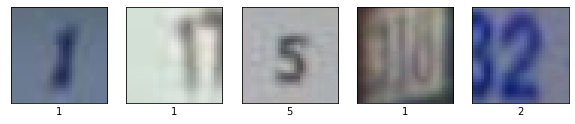

In [7]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [8]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
  """ Prints text in red. Just for fun.
  """
  if verbose>0:
    print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
  """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
  function following the Keras API. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  try:
    model = load_model(os.path.join(base_dir, name+extension))
  except OSError:
    shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
    return False
  return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
  """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
  return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
  """ Trains and evaluates the given model on the predefined train and test splits,
  stores the trained model and learning curves. Also prints out a summary of the 
  model and plots the learning curves.
  Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
  """
  model = model_builder(**kwargs)
  if not model:
    shout("No model is returned by the model_builder")
    return
  if not hasattr(model, 'fit'):
    shout("Model is not built correctly")
    return
  learning_curves = {}
  if train and not stop_training: # Train anew
    shout("Training the model", verbose)
    if generator:
      generator, X_val, y_val = data
      history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                          steps_per_epoch=steps_per_epoch, verbose=1, 
                          validation_data=(X_val, y_val))
      learning_curves = history.history
    else:
      X_train, X_val, y_train, y_val = data
      history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                          verbose=1, validation_data=(X_val, y_val))
      learning_curves = history.history
    shout("Saving to file", verbose)
    save_model_to_file(model, base_dir, name)
    with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
      pickle.dump(learning_curves, file_pi)
    shout("Model stored in "+base_dir, verbose)
  else: # Load from file
    shout("Loading model from file", verbose)
    model = load_model_from_file(base_dir, name)
    if not model:
      shout("Model not found")
      return
    learning_curves = None
    try:
      learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
    except FileNotFoundError:
      shout("Learning curves not found")
      return
    shout("Success!", verbose)
  # Report
  print(model.summary())
  lc = pd.DataFrame(learning_curves)
  lc.plot(lw=2,style=['b:','r:','b-','r-']);
  plt.xlabel('epochs');
  print(lc.apply(minMax))

Training the model
Epoch 1/3
1986/1986 [==============================] - 2s 1ms/step - loss: 2.2496 - accuracy: 0.1902 - val_loss: 2.2331 - val_accuracy: 0.1910
Epoch 2/3
1986/1986 [==============================] - 2s 954us/step - loss: 2.2332 - accuracy: 0.1910 - val_loss: 2.2331 - val_accuracy: 0.1910
Epoch 3/3
1986/1986 [==============================] - 2s 952us/step - loss: 2.2333 - accuracy: 0.1910 - val_loss: 2.2331 - val_accuracy: 0.1910
Saving to file
Model stored in ./Models
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 10)                30730     
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                          

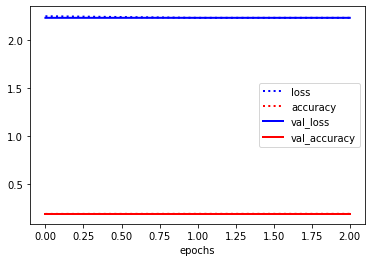

In [11]:
# Toy usage example
# Remove before submission
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_toy_model():
  model = models.Sequential()
  model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
  model.add(layers.Dense(10, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

# First build and store
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=True, epochs=3, batch_size=32)

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 10)                30730     
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  2.233234  0.190246  2.233053      0.190974
max  2.249624  0.190954  2.233113      0.190974


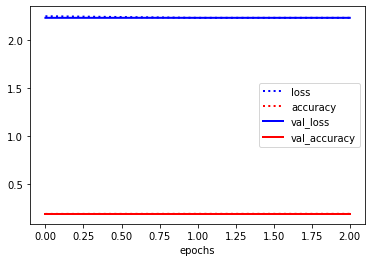

In [12]:
# Toy usage example
# Remove before submission
# With train=False: load from file and report the same results without rerunning
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=False)

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_3 (Reshape)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 412)               1266076   
                                                                 
 dense_9 (Dense)             (None, 212)               87556     
                                                                 
 dense_10 (Dense)            (None, 60)                12780     
                                                                 
 dense_11 (Dense)            (None, 10)                610       
                                                                 
Total params: 1,367,022
Trainable params: 1,367,022
Non-trainable params: 0
_________________________________________________________________
None
      

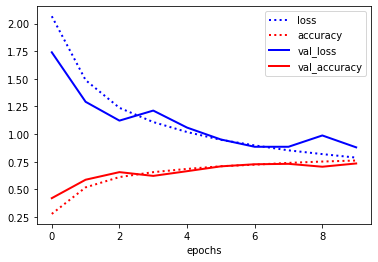

In [15]:
def build_model_1_1():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(412, activation='relu'))
    model.add(layers.Dense(212, activation='relu')) 
    model.add(layers.Dense(60, activation='relu')) 
    model.add(layers.Dense(10, activation='softmax')) 
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    pass
run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=10, batch_size=32)
answer_q_1_1 = """
               The model is build with four hidden layers that have 412,212,60 nodes and uses the relu activation (adam and rmsprop resulted in a lower accuracy),
               to create the pyramide effect.It uses the sgd optimizer and the evaluation is runned with 10 epochs 
               to give the model space to increase (avoid underfitting). With more epochs the accuracy did not increase.  
               For the first five epochs the acc. increases a lot then the acc decreases for epoch 6,7 wherafter the accuracy increases again in epoch 8 and 9.   
               """
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [16]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

# Replace with the preprocessed data
X_train_gray = rgb2gray(X_train)
X_val_gray = rgb2gray(X_val)
preprocessed_split = (X_train_gray, X_val_gray, y_train, y_val)

Loading model from file
Success!
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_5 (Reshape)         (None, 1024)              0         
                                                                 
 dense_16 (Dense)            (None, 412)               422300    
                                                                 
 dense_17 (Dense)            (None, 212)               87556     
                                                                 
 dense_18 (Dense)            (None, 60)                12780     
                                                                 
 dense_19 (Dense)            (None, 10)                610       
                                                                 
Total params: 523,246
Trainable params: 523,246
Non-trainable params: 0
_________________________________________________________________
None
         l

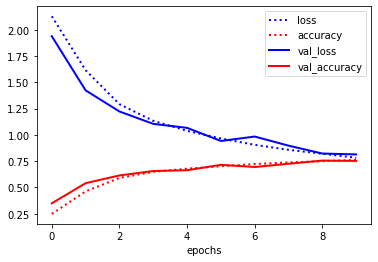

In [18]:
# Adjusted model
def build_model_1_2():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1))) # Set 1 because this is the code for grey-scale
    model.add(layers.Dense(412, activation='relu'))
    model.add(layers.Dense(212, activation='relu')) 
    model.add(layers.Dense(60, activation='relu')) 
    model.add(layers.Dense(10, activation='softmax')) # without normalization acc=0.33
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    pass

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=10, batch_size=32)
answer_q_1_2 = """
               Compared to q1.1 the final accuracy is a little higher as a result of a smoother increasing curve. 
               In model q1.2 the curves for val_loss and val_accuracy are more linear than the ones in q1.1 which shows that the model
               tends to learn faster as it needs less number of parameters for the gray scale
               The model does not perform much better because the more dimenssions provided in the color might provide more information to the model
               for better result. 
               """

print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_8 (Reshape)         (None, 1024)              0         
                                                                 
 dense_31 (Dense)            (None, 512)               524800    
                                                                 
 dense_32 (Dense)            (None, 512)               262656    
                                                                 
 dense_33 (Dense)            (None, 512)               262656    
                                                                 
 dense_34 (Dense)            (None, 412)               211356    
                                                                 
 dense_35 (Dense)            (None, 212)               87556     
                                                                 
 dense_36 (Dense)    

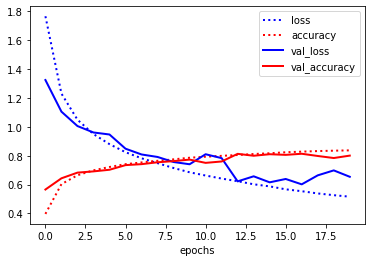

In [21]:
import tensorflow.keras as keras

def build_model_1_3():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='selu'))
    model.add(layers.Dense(512, activation='tanh'))
    model.add(layers.Dense(412, activation='selu'))
    model.add(layers.Dense(212, activation='selu'))
    model.add(layers.Dense(60, activation='selu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    pass
    
run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=20, batch_size=32)
answer_q_1_3 = """
               Applying batchnormalization for all the layers resulted in a much lower accuracy. 
               Together with dropout of 0.3 and 0.5 the accuracy also didn't improve. 
               Increasing the amount of epochs did improve the accuracy to 0.8. 
               The plot has no smooth lines anymore and shows a decreasing around epoch 11-16 then the los decreases and accuracy increases.
               Increasing the batch size (to 64) did not influence the accuracy significantly. 
               """
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 96)        55392     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 96)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 96)          83040     
                                                                 
 flatten (Flatten)  

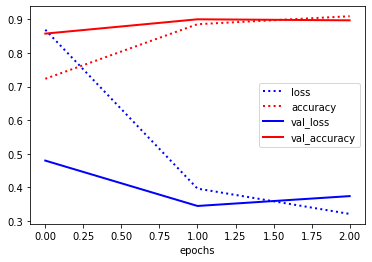

In [23]:
# https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7
# Have a look at this site for understanding and possebilities to add for the model
def build_model_2_1():
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(96, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(96, (3, 3), activation='relu', padding='same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model
run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=3, batch_size=32)
answer_q_2_1 = """
                Opted to include 64 filters in the first layer to preserve information well.
               Increased the number of filters in deeper layers to preserve information about input as 
               resolution decreases. Relu: simplifies the training of deeper networks & faster than sigmoid.
               Added Dense and Softmax layer to classify images. Accuracy is 0.9086. We see a steep incline
               in accuracy at epoch 1. Afterwards accuracy increases steadily & stable. We could increase
               accuracy by adding additional layers or increase the size of one layer to captivate more
               information. However this would become very computational instensive.
               """
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Loading model from file
Success!
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 96)        55392     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 96)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 96)          83040     
                                                                 
 flatten_3 (Flatten)

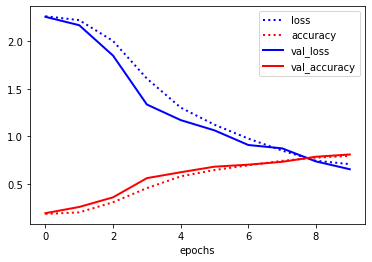

In [27]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(
#     rotation_range=10,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,)

train_datagen = ImageDataGenerator(
    shear_range=0.5
)
augmented_data = train_datagen.flow(X_train_gray, y_train, batch_size=64)
augmented_split = (augmented_data, X_val_gray, y_val)

run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, train=False, generator=True, epochs=10, batch_size=32)

answer_q_2_2 = """
               After testing several different options and alternatives, it can be concluded that ImageDataGeneretor does not contribute towards a better model. We advise
               to not implement data augmentation.
               The different options for ImageDataGenerator are fairly well intuitively explainable. Firstly, rotation_range had no significant impact
               since changing the rotation can lead towards different patterns to be detected in these images. Secondly, width_shift_range and height_shift_range
               do not contribute as well. Since most numbers encompass the entire image already, implementing this brings in noise. Shear_range as well as zoom_range
               don't contribute since again, information gets lots due to the all-encompasing size of the numbers on the images. Horizontal_flip also decreases the accuracy.
               This can be intuitively explained since potential local patterns are flipped, leading to wrong classifications. 
               """
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

621/621 [==============================] - 6s 9ms/step - loss: 0.6463 - accuracy: 0.8087


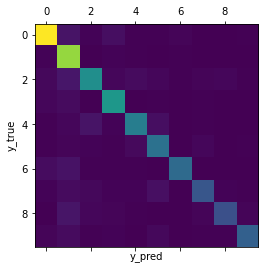

[[3322  181   39  130   15   25   46   12    2   20]
 [  32 2801    7   32   15   12   26   10   10    2]
 [  69  209 1647   56   99   58   20   45   57   16]
 [  55  102   13 1759    8   21    7   15   14    2]
 [  18   63  177   33 1406  120    7   16    6    7]
 [  25   43   33   25   81 1244    6   61    6   17]
 [ 113  159   20   20   26   12 1154    6    4    9]
 [  31   94   70   30   31  139    9  884   32   21]
 [  10  184   56   48   23   13    8   48  819   42]
 [  45   97   18   28    4   67    8   20   27 1024]]


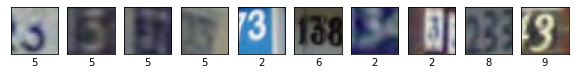

In [28]:
import matplotlib.pyplot as plt
from sklearn import metrics

model = load_model_from_file(base_dir, "model_2_2")
test_accuracy_3_1 = model.evaluate(rgb2gray(X_test), y_test)

def plot_confusion_matrix():
    model = load_model_from_file(base_dir, "model_2_2")
    y_pred = model.predict(rgb2gray(X_test))
    matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
    plt.matshow(matrix)
    plt.ylabel('y_true')
    plt.xlabel('y_pred')
    plt.show()
    print(matrix)
    pass

def plot_misclassifications():
    model = load_model_from_file(base_dir, "model_2_2")
    y_pred = model.predict(rgb2gray(X_test))
    select_class = 2
    amount = 10
    index_to_show = []
    test = y_test.argmax(axis=1)
    pred = y_pred.argmax(axis=1)
    for i in range(10000):
        if test[i] == select_class:
            if pred[i] != select_class:
                index_to_show.append(i)
            if len(index_to_show) >= amount:
                break
    plot_images(X_test[index_to_show], y_pred[index_to_show])

plot_confusion_matrix()
plot_misclassifications()

# Rewrite this for 2_2 model, is still for 2_1 model.
answer_q_3_1 = """
               First I will discuss the confusion matrix. This is plotted both graphically, as well as numerically, 
               since the differences were to small to notice from the graph. There is no pair of classes which 
               stands out on being switched around. This is most likely due to the fact that these misclassifications happen
               due to a very blurred image, or multiple numbers being on the image as shown by the misclassified plots.
               Many of these images to are so blurry they ar hard to read even for a human, and others have more than one number
               in there, possible confusing the models.
               """

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

C:\Users\nasir\AppData\Local\Temp/ipykernel_9880/3850713723.py:28: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


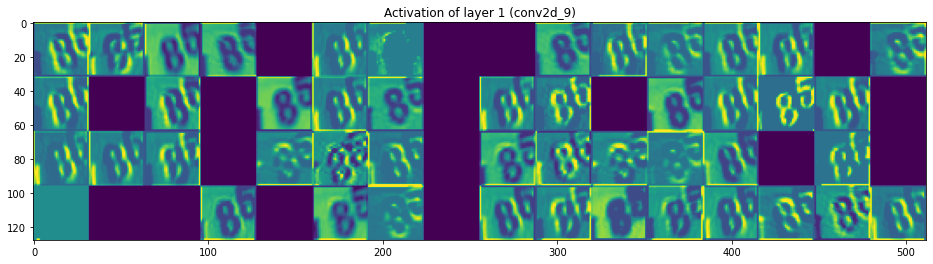

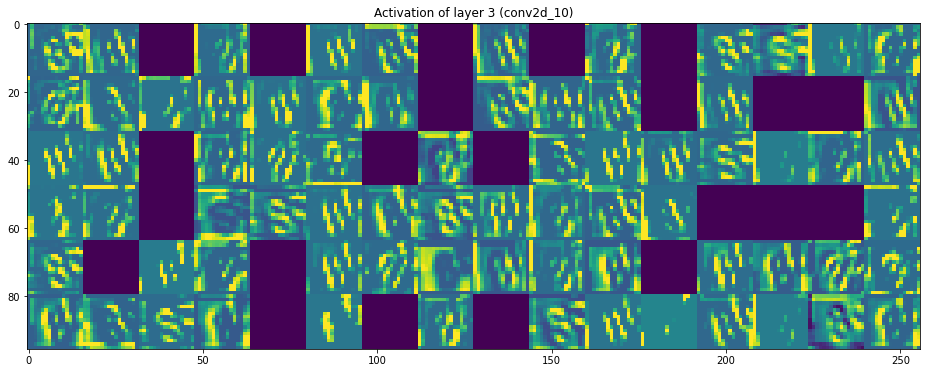

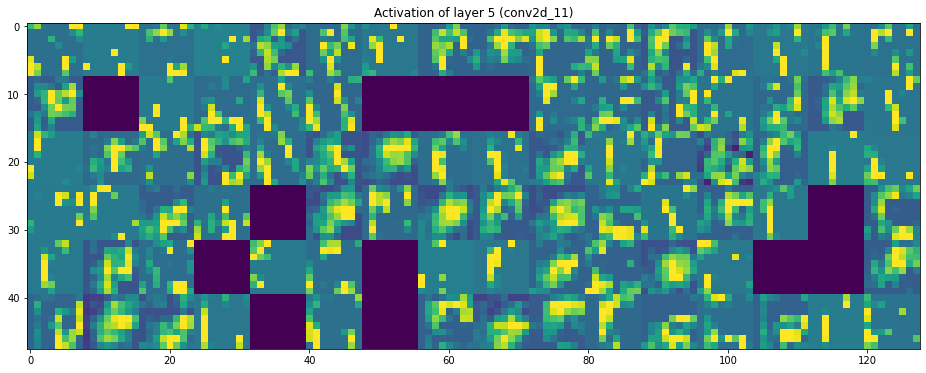

In [29]:
from tensorflow.keras.preprocessing import image
import numpy as np

def plot_layer(layer_index, activations, layer_names):
    start = layer_index
    end = layer_index+1
    images_per_row = 16
    # Now let's display our feature maps
    for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]

        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]

        # We will tile the activation channels in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        # We'll tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
                del channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()



def plot_activations():
    model = load_model_from_file(base_dir, "model_2_2")
    # Extracts the outputs of the top 8 layers:
    layer_outputs = [layer.output for layer in model.layers[:8]]
    # Creates a model that will return these outputs, given the model input:
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

    img = rgb2gray(X_test)[0]
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0) 

    activations = activation_model.predict(img_tensor)
    images_per_row = 16

    layer_names = []
    for layer in model.layers[:8]:
        layer_names.append(layer.name)
    for i in [0,2,4]:
        plot_layer(i, activations, layer_names)
        
plot_activations()
answer_q_3_2 = """
               Three different layers are shown. For each of these layers every filter is plotted. Due to memory problems doing more at once was infeasible,
               yet the main explanation on if the model is learning something can be made from this information. The first layer has found the outlines of 
               the to find digit. It is able to find the edges of the number. The 3rd layer is already more abstract, it has identified the filling of the 
               to identify digit. The 5th layer is so abstract, we are not able to idetify what the model has found here. In general it can saud that the 
               model is learnign from these figures. The information in each of the layers gets more and more abstract.
               """

### Question 3.3: Visualizing the learned embeddings with tSNE (4 points)

Extract the learned embeddings of the images from X_train using your `model_2_2` and plot them on a 2D map using [tSNE](https://lvdmaaten.github.io/tsne/) as the dimensionality reduction technique.

- Implement a function `create_embeddings` to extract the n-sized embeddings of the training set based on the  Convolutional part of `model_2_2` (e.g VGG16 generates 512-sized embeddings)
- Implement a function `compute_tsne` that applies scikit-learn's implementation of [tSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to reduce the size of the embeddings from n to 2 (e.g for VGG16 this will mean `original_array` of  size (num_images, 512) compressed to a reduced array of size (num_images, 2))
- Implement a function `plot_tsne` that plots the 2D vector on a map highlighting the formed clusters, and color-coded by the true binary labels. Please note that this may take a while to compute the tSNE embeddings.
- Interpret the results from the map in `answer_q_2_3`

In [30]:
from sklearn.manifold import TSNE
from tensorflow import keras



def create_embeddings(model_file):
    """ Returns the image embeddings of X_train learned in the given model
    """
    model = load_model_from_file(base_dir, 'model_2_2')
    m2 = keras.Model(inputs=model.input, outputs=model.get_layer('flatten_3').output)
    embedding_output = m2.predict(X_train_gray)
    return embedding_output

def compute_tsne(original_array):
    """ Returns the 2D embeddings of original_array created by TSNE
    """
    tsne = TSNE(n_components=2, learning_rate='auto', init='random')
    tsne_embeded = tsne.fit_transform(original_array)
    return tsne_embeded

# n-sized embeddings extracted from X_train and reduced to 2-sized embeddings
dn_embs = create_embeddings("model_2_2")
d2_embs = compute_tsne(dn_embs)

Answer is 438 characters long


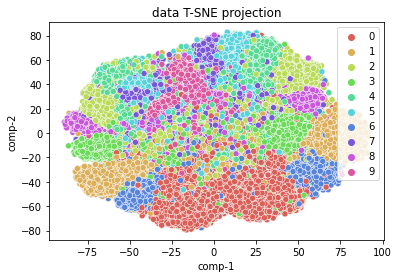

In [31]:
import seaborn as sns


def plot_tsne(tsne_embeds, labels):
    df = pd.DataFrame()
    df["y"] = [i for item in y_train for i in range(10) if item[i] == 1]
    df["comp-1"] = tsne_embeds[:,0]
    df["comp-2"] = tsne_embeds[:,1]

    sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                    palette=sns.color_palette("hls", 10),
                    data=df).set(title="data T-SNE projection")

plot_tsne(d2_embs, y_train)

answer_q_2_3 = """
               From the plot we see that not all classes are clearly separated. For the same digits are also formed more than one cluster. 
               For instance digit 1, has 2 clusters which may differ on the orientation of the digit. Also there are images that are missclasified
               (digit 3 in the red cluster of digit 0) and specially it is difficult to assign to a cluster the digits in the middle. 
               """
print("Answer is {} characters long".format(len(answer_q_2_3)))

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base.
- You can also add any kind of regularization.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Loading model from file
Success!
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D

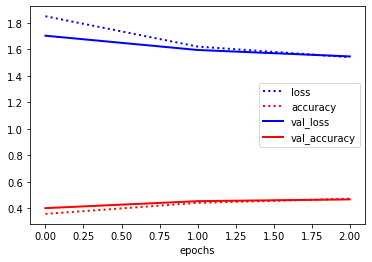

In [34]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model


input_shape=(32,32,3)
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)


def build_model_4_1():
    top_model = conv_base.output
    top_model = layers.Flatten(name="flatten")(top_model)
    top_model = layers.Dense(64, activation='relu')(top_model)
    output_layer = layers.Dense(10, activation='softmax')(top_model)
    model = Model(inputs=conv_base.input, outputs=output_layer)

    for layer in model.layers[:-3]:
        layer.trainable=False
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

    return model
    

run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=False, epochs=3, batch_size=32)
answer_q_4_1 = """
                when using convolutional layers of VGG16 as cov_base, we can see training loss and validation loss are high 
                that means the model is uderfitted.
               """
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Optimizing transfer (5 points)

Perform the same transfer learning as in `Question 4.1`, but try to improve the performance.

- Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Consider other models to transfer from. For a comparison between different architectures, see [this link](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d), or choose one of the available architectures from [Keras Applications](https://keras.io/api/applications/). 
- Keep in mind that bigger models don't always perform better, some don't work on small images. Also try to use models that do
not take more than 100MB of storage.
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_2'.


In [35]:
augmented_data = train_datagen.flow(X_train, y_train, batch_size=64)
augmented_split = augmented_data, X_val, y_val

Loading model from file
Success!
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                           

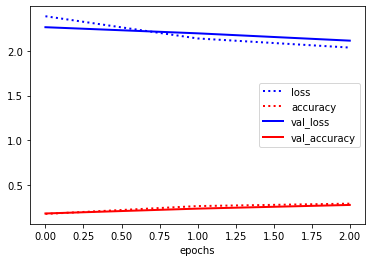

In [37]:
# MODEL DenseNet121 with freezing layers
from tensorflow.keras.applications.resnet_v2 import ResNet50V2


input_shape=(32,32,3)
conv_base = ResNet50V2(weights='imagenet', include_top=False, input_shape=input_shape)

def build_model_4_2():
    
    top_model = conv_base.output
    top_model = layers.Flatten(name="flatten")(top_model)
    top_model = layers.Dense(64, activation='relu')(top_model)
    output_layer = layers.Dense(10, activation='softmax')(top_model)
    model = Model(inputs=conv_base.input, outputs=output_layer)

    for layer in model.layers[:-6]:
        layer.trainable=False
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

run_evaluation("model_4_2", build_model_4_2, augmented_split, base_dir, 
               train=False, generator=True, epochs=3, batch_size=None)

answer_q_4_2 = """
        model ResNet50V2 by using the data augmentation and freezing layers did not improve the accuaracy.Also we checked this model 
        with unfreezing few layers and again the result did not improved a lot.So we used VGG16 model again but by using
        data augmentation and also unfreezing few layers (model_4_2_1), the model could work better and accuracy on train set improved from
        0.47 to 0.51. As a result, when the pretrained model is not similar to an application, it can not improve the accuracy
        The second result is unfreezing can improve the accuracy because can update the weights based on the input. so it can improve the
        accuracy.
               """

print("Answer is {} characters long".format(len(answer_q_4_2)))


Loading model from file
Success!
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D

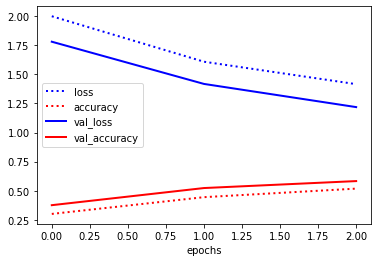

In [40]:
# Load pre-trained model, can be other than VGG16
input_shape=(32,32,3)
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

def build_model_4_2():
    
    top_model = conv_base.output
    top_model = layers.Flatten(name="flatten")(top_model)
    top_model = layers.Dense(64, activation='relu')(top_model)
    output_layer = layers.Dense(10, activation='softmax')(top_model)
    model = Model(inputs=conv_base.input, outputs=output_layer)

    for layer in model.layers[:-9]:
        layer.trainable=False
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

run_evaluation("model_4_2_1", build_model_4_2, augmented_split, base_dir, 
               train=False, generator=True, epochs=3, batch_size=None)

answer_q_4_2 = """
               Your answer 
               """

print("Answer is {} characters long".format(len(answer_q_3_2)))